In [1]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


# Check TensorFlow version and GPU availability
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# Allow memory growth for GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


Num GPUs Available:  1
TensorFlow version: 2.17.0
Num GPUs Available:  1


In [2]:
import zipfile
import os

# Define the path to the uploaded zip file and the extraction directory
zip_path = '/content/crack.zip'
extract_dir = '/content/images'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the contents to verify extraction
os.listdir(extract_dir)


['crack', 'nocrack']

In [3]:
crack_dir = os.path.join(extract_dir, 'crack')
no_crack_dir = os.path.join(extract_dir, 'no_crack')

# Verify the paths
print("Crack images directory:", crack_dir)
print("No crack images directory:", no_crack_dir)


Crack images directory: /content/images/crack
No crack images directory: /content/images/no_crack


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [5]:
# Parameters
img_width, img_height = 150, 150
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    extract_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    extract_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


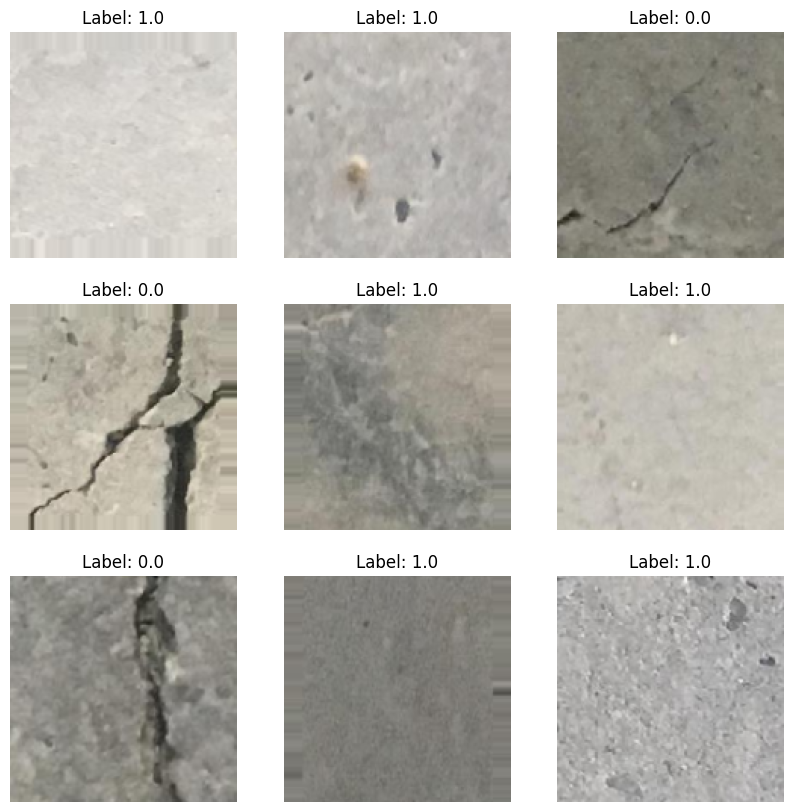

In [6]:
# Plot sample images
def plot_sample_images(generator):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        # Use __next__() instead of next() for generator in Keras
        img, label = generator.__next__()
        plt.subplot(3, 3, i+1)
        plt.imshow(img[0])
        plt.title(f'Label: {label[0]}')
        plt.axis('off')
    plt.show()

plot_sample_images(train_generator)


In [7]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 203ms/step - accuracy: 0.9861 - loss: 0.0583 - val_accuracy: 0.9839 - val_loss: 0.0556
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9688 - loss: 0.0635 - val_accuracy: 0.8750 - val_loss: 0.3385
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 198ms/step - accuracy: 0.9780 - loss: 0.1039 - val_accuracy: 0.9718 - val_loss: 0.1181
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 1.0000 - loss: 0.1035 - val_accuracy: 0.6875 - val_loss: 1.1974
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.9903 - loss: 0.0499 - val_accuracy: 0.9869 - val_loss: 0.0454
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9688 - loss: 0.0729 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.9636 - loss: 0.1264 - val_accuracy: 0.9108 - val_loss: 0.2002
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8750 - loss: 0.3250 - val_accuracy: 0

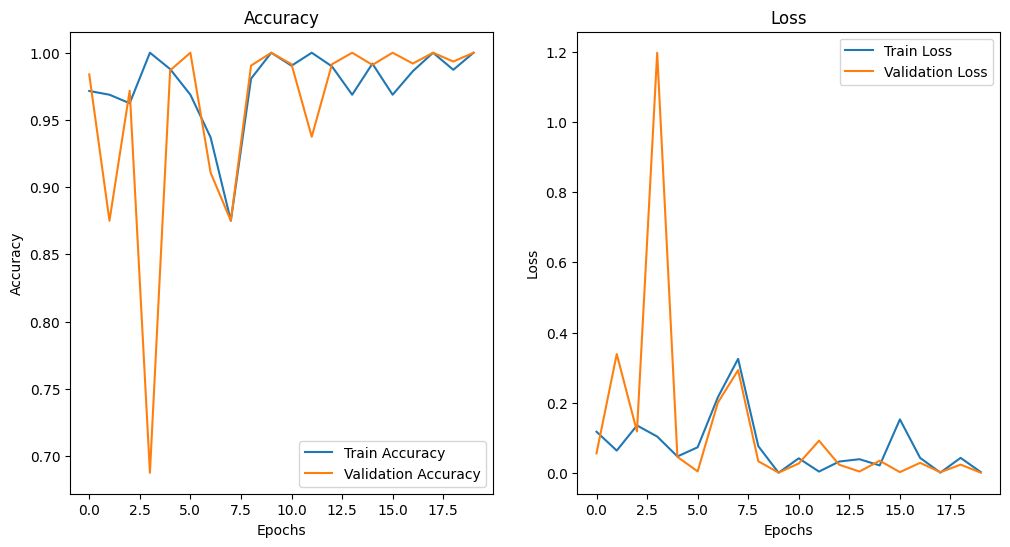

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [15]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9921 - loss: 0.0244
Test Loss: 0.023623026907444
Test Accuracy: 0.9929999709129333


In [16]:
model.save('crack_detection_model.h5')


In [17]:
from google.colab import files
files.download('crack_detection_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>